## Principal Component Analysis

##### Problem Statement: After transforming the raw data, we now have a dataset with 23 attributes. However, the high number of attributes might pose challenges due to potential complexity. To address this, we can explore dimensionality reduction techniques to identify the most significant features. One such method is Principal Component Analysis (PCA).

##### By employing PCA, we aim to discover key features that can effectively distinguish individuals at risk of cardiovascular diseases from those who are not at risk. Additionally, reducing the dimensionality of the data through PCA could lead to faster model training times while preserving comparable performance.

### Libraries

In [1]:
# load libaries
import pandas as pd                  # for dataframe
import numpy as np                   # for dealing with numpy
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization

# a magic function that renders the figure in a notebook 
%matplotlib Inline

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)

### Import Data

In [2]:
# Import data
df = pd.read_csv('df19_20.csv')
df.head()

,ENROLID,AGE,SEX,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,LABEL
0,571103,57,1,1,0,0,0,0,1,0,0,5,2,0,1,4,0,0,0,9,2,0,1,0,1
1,13452502,54,1,3,0,0,0,1,0,0,0,0,0,2,0,5,0,0,0,2,1,0,1,0,0
2,14357306,27,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14828304,16,2,0,0,0,0,0,3,0,0,0,0,0,1,2,0,0,1,3,2,0,2,0,0
4,15194602,59,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7,0,0


### Split Data

In [3]:
# Set Input Variables and Target Variable
X = df.drop(columns = ['ENROLID', 'LABEL'], axis = 1)
y = df['LABEL']

In [4]:
# import train_test split function
from sklearn.model_selection import train_test_split 

# use train_test_split function to split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
X_train.shape

(26530, 23)

([<matplotlib.axis.XTick at 0x1fdf89afac0>,
 [Text(0, 0, 'No Risk'), Text(1, 0, 'At Risk')])

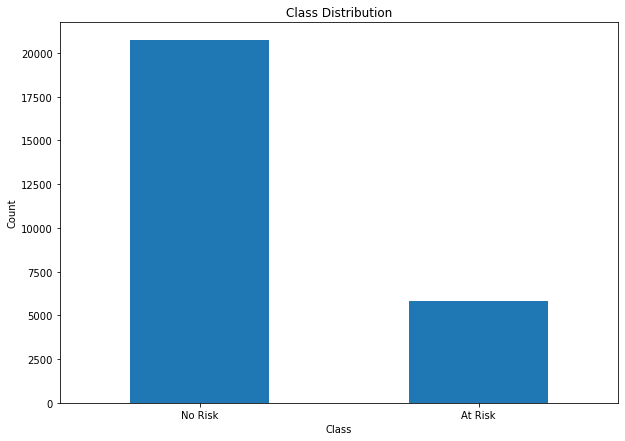

In [6]:
# label frequency
plt.figure(figsize=(10, 7))
ax = y_train.value_counts().plot.bar()
ax.set_title('Class Distribution')
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Risk', 'At Risk'], rotation=0)

### Standardize data

In [7]:
# import scaler
from sklearn.preprocessing import StandardScaler

In [8]:
# create an instance of the scaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### SMOTE to tackle imbalanced data problem

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [9]:
# install first if using it first-time
# import sys
# !{sys.executable} -m pip install imblearn

In [10]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE

#### SMOTE to oversample the training data

In [11]:
# create an instance of SMOTE model
sm = SMOTE(random_state = 1)

# apply SMOTE to training set
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

In [12]:
X_train_sm.shape

(41434, 23)

In [13]:
y_train_sm

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

([<matplotlib.axis.XTick at 0x1fdfb7b1ca0>,
 [Text(0, 0, 'No Risk'), Text(1, 0, 'At Risk')])

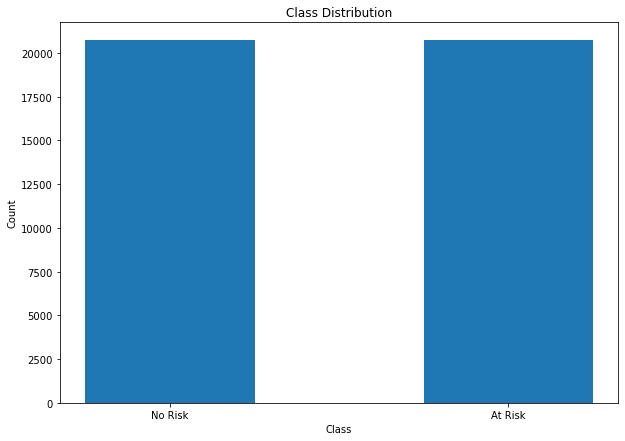

In [14]:
#search unique labels
lebels = list(np.unique(y_train_sm))

#count occurrences of each unique label
lebel_count = list(np.unique(y_train_sm, return_counts=True)[1])

# label frequency
plt.figure(figsize=(10, 7))
plt.bar(lebels, lebel_count, width = 0.5)
plt.title('Class Distribution')
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Risk', 'At Risk'], rotation=0)

### SVM modelling

In [16]:
#Import svm model
from sklearn import svm

In [17]:
# create a svm Classifier
SVM_clf = svm.SVC(probability=True) # probability=True

In [18]:
# train the model (682 sec)
SVM_clf.fit(X_train_sm, y_train_sm) 

SVC(probability=True)

##### training took 682 seconds

#### Evaluate the Model without PCA

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix

In [20]:
# Calculate the probability ROC
y_pred_proba = SVM_clf.predict_proba(X_test)[:, 1]

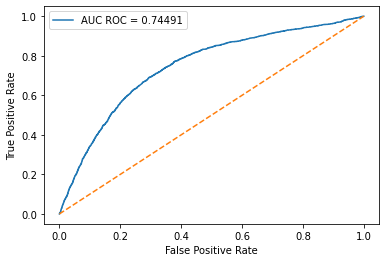

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

<Figure size 720x504 with 0 Axes>

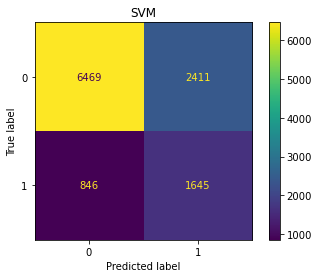

In [22]:
plt.figure(figsize=(10, 7))
plot_confusion_matrix(SVM_clf, X_test, y_test)
plt.title("SVM")

In [23]:
# PRC
from sklearn.metrics import auc, precision_recall_curve
precision_poly, recall_poly, thresholds_poly = precision_recall_curve(y_test, y_pred_proba)

In [24]:
# AUPRC
auprc_poly = auc(recall_poly, precision_poly)

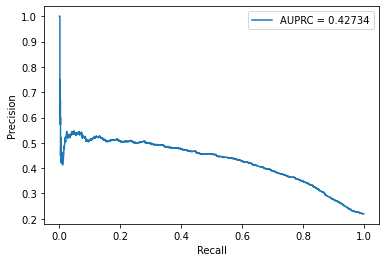

In [25]:
# Plot the PRC
plt.plot(recall_poly, precision_poly, label=f'AUPRC = {auprc_poly:.5f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [26]:
# another way to account for when denominator is zero
numerator = 2 * recall_poly * precision_poly
denom = recall_poly + precision_poly
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = thresholds_poly[np.argmax(f1_scores)]

In [27]:
print('Best threshold: ', max_f1_thresh)
print('Best F1-Score: ', max_f1)

Best threshold:  0.4572625088622057
Best F1-Score:  0.50418440757598


## PCA

In [28]:
# import PCA
from sklearn.decomposition import PCA

# create PCA class with reduction to 2 dimensions
pca = PCA(n_components=2)

# apply PCA on the features
principalComponents = pca.fit_transform(X_train_sm)

# put the principal components in a dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [29]:
# combine with the labels
principalDf['LABEL'] = y_train_sm.tolist()

In [30]:
principalDf

,principal component 1,principal component 2,LABEL
0,0.406124,-0.608142,1
1,0.076581,2.658609,0
2,0.363070,1.163970,0
3,-1.592793,0.244234,0
4,-1.170138,-0.371003,0
...,...,...,...
41429,2.235940,-0.797944,1
41430,5.234914,-1.286660,1
41431,-1.821338,1.585693,1
41432,-0.118139,-1.316325,1


### Visualize the 2D projection

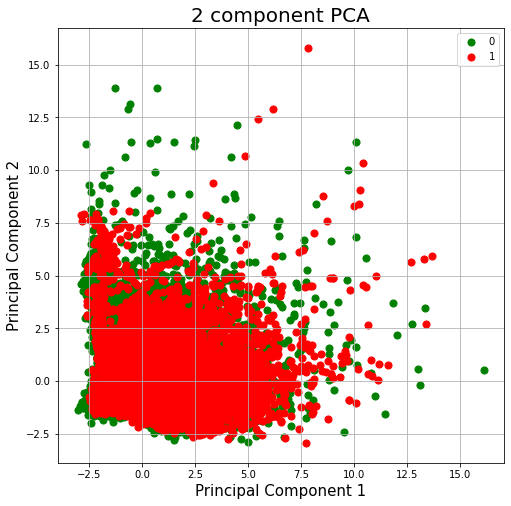

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['LABEL'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [32]:
pca.explained_variance_ratio_

array([0.12884758, 0.07462912])

##### Unfortunately, The PCA plot does not reveal a clear distinction between the two classes, indicating that the data is complex and not easily separable.

#### Find the minimum number of principal components such that 95 percent of the variance is retained.

In [33]:
# Make an instance of the PCA Model
pca_95 = PCA(.95)

In [34]:
# fit PCA on the training set
pca_95.fit(X_train_sm)

PCA(n_components=0.95)

In [35]:
# see how many components PCA has after fitting the model
pca_95.n_components_

20

#### Find the minimum number of principal components such that 85 percent of the variance is retained.

In [36]:
# Make an instance of the PCA Model
pca_85 = PCA(.85)

In [37]:
# fit PCA on the training set
pca_85.fit(X_train_sm)

PCA(n_components=0.85)

In [38]:
# see how many components PCA has after fitting the model
pca_85.n_components_

16

##### for 85% of the variance, the dimension is reduced to 16 (from 23)

In [39]:
# transform (apply the mapping) the training and testing set
X_train_sm = pca_85.transform(X_train_sm)
X_test = pca_85.transform(X_test)

### Try the classification model on the reduced data

In [40]:
# let's try with SVM model
# import svm model
from sklearn import svm

In [41]:
# create a svm Classifier
SVM_clf = svm.SVC(probability=True) # probability=True

In [42]:
# train the model
SVM_clf.fit(X_train_sm, y_train_sm) 

SVC(probability=True)

##### training took 655 seconds

#### Evaluate the Model

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix

In [44]:
# Calculate the probability ROC
y_pred_proba = SVM_clf.predict_proba(X_test)[:, 1]

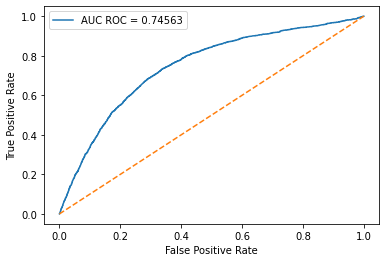

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC ROC score for SVM
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\nasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

<Figure size 720x504 with 0 Axes>

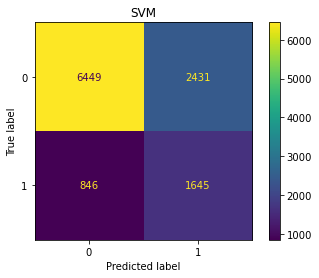

In [46]:
plt.figure(figsize=(10, 7))
plot_confusion_matrix(SVM_clf, X_test, y_test)
plt.title("SVM")

In [47]:
# PRC
from sklearn.metrics import auc, precision_recall_curve
precision_poly, recall_poly, thresholds_poly = precision_recall_curve(y_test, y_pred_proba)

In [48]:
# AUPRC
auprc_poly = auc(recall_poly, precision_poly)

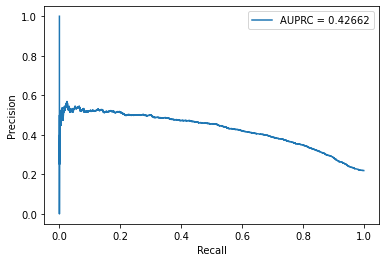

In [49]:
# Plot the PRC
plt.plot(recall_poly, precision_poly, label=f'AUPRC = {auprc_poly:.5f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [50]:
# another way to account for when denominator is zero
numerator = 2 * recall_poly * precision_poly
denom = recall_poly + precision_poly
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = thresholds_poly[np.argmax(f1_scores)]

In [51]:
print('Best threshold: ', max_f1_thresh)
print('Best F1-Score: ', max_f1)

Best threshold:  0.46701646627210014
Best F1-Score:  0.5031781226903179


##### After using PCA for dimensionality reduction, the training time improved slightly, but the performance of the classification model was only marginally affected. The AUC score showed a small improvement, but there was a slight decrease in the true negative rate and an increase in the false negative rate, leading to a minor drop in the area under the precision-recall curve (by only 0.00072).